In [5]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data
import pandas as pd
import datetime
import numpy
from math import sqrt
import locale
from scipy.stats import norm
os.chdir('C:/Users/q/workspace/simulation')



In [6]:
stock1 = pd.read_csv('stock01.csv',encoding = 'cp949')
stock2 = pd.read_csv('stock02.csv',encoding = 'cp949')
stock3 = pd.read_csv('stock03.csv',encoding = 'cp949')
stock4 = pd.read_csv('stock04.csv',encoding = 'cp949')

stock = pd.concat([stock1,stock2],axis=0)
stock = pd.concat([stock,stock3],axis=0)
stock = pd.concat([stock,stock4],axis=0)


In [83]:
stock.head(1000)

,종목명,날짜,시가,고가,저가,종가,거래량,거래금액
0,코웨이,20100104,38400.0,39150.0,38000.0,38800.0,244875,9484203
1,코웨이,20100105,38600.0,39000.0,38000.0,38700.0,239751,9276766
2,코웨이,20100106,38450.0,38600.0,37400.0,37800.0,365590,13858474
3,코웨이,20100107,38150.0,38150.0,36900.0,37650.0,293314,10942420
4,코웨이,20100108,37550.0,37750.0,36900.0,37600.0,229486,8526552
5,코웨이,20100111,37300.0,37600.0,36900.0,37200.0,278583,10321783
6,코웨이,20100112,36900.0,37100.0,36300.0,36900.0,296307,10868551
7,코웨이,20100113,36600.0,36700.0,35800.0,35800.0,206594,7470969
8,코웨이,20100114,36150.0,36200.0,34900.0,35300.0,462701,16369526
9,코웨이,20100115,35100.0,35200.0,34000.0,35200.0,692106,23845803


In [7]:
stock = stock.drop_duplicates()


In [4]:
set(stock['종목명'])

{'웰바이오텍',
 '파루',
 '디젠스',
 '파워로직스',
 '셀트리온제약',
 '아난티',
 '한네트',
 'SIMPAC',
 '삼일',
 '엔피케이',
 '골프존뉴딘홀딩스',
 '한국기업평가',
 '파세코',
 '유니드',
 '알엔투테크놀로지',
 '프리엠스',
 '제로투세븐',
 '나이스디앤비',
 '엘지하우시스',
 '광림',
 '해태제과식품주식회사',
 '한솔시큐어',
 '타이거일렉',
 '패션플랫폼',
 '한국알콜산업',
 '계룡건설산업',
 '흥국',
 '롯데관광개발',
 '대림통상',
 'NPC',
 '유아이디',
 '흥아해운',
 '일성신약',
 '카스',
 '마니커',
 '주식회사제노포커스',
 '파라다이스',
 '칩스앤미디어',
 '인터지스',
 '대덕GDS',
 '엘디티',
 '탑엔지니어링',
 '미원상사',
 '아바텍',
 '무림에스피',
 '케이에스에스해운',
 '삼아제약',
 '세보엠이씨',
 '고려신용정보',
 'LS산전',
 '제룡전기',
 '진양폴리우레탄',
 '현대약품',
 '피엔티',
 '코미코',
 '신세계아이앤씨',
 '금호타이어',
 '현대해상화재보험',
 '포스링크',
 '원풍',
 '주연테크',
 '현대일렉트릭',
 '비트컴퓨터',
 '우리넷',
 '제이웨이',
 '케이티',
 '벽산',
 '대성미생물연구소',
 '비에이치아이',
 '위닉스',
 '한국경제티브이',
 '신풍제약',
 '해마로푸드서비스',
 '이화공영',
 'HDC현대산업개발',
 '디스플레이테크',
 '대한약품공업',
 '디티앤씨',
 '육일씨엔에쓰',
 '웹젠',
 '바른손이앤에이',
 '네오위즈',
 '이베스트투자증권',
 '지니뮤직',
 '케이티스카이라이프',
 '우진플라임',
 '세동',
 '씨제이오쇼핑',
 '서연전자',
 '코오롱',
 '삼표시멘트',
 '디딤',
 '한국단자공업',
 '에스비에스콘텐츠허브',
 '삼목에스폼',
 '파트론',
 '만도',
 '핸디소프트',
 '삼원테크',
 '미래에셋생명보험',
 '시노펙스',
 '네오오

In [108]:
stock_data = stock[stock['종목명']=='휴젤']

In [110]:
stock_data[stock_data['날짜']==20170103]

,종목명,날짜,시가,고가,저가,종가,거래량,거래금액
932695,휴젤,20170103,314100.0,324000.0,313000.0,320900.0,27673,8856661


In [86]:
stock_data = stock[stock['종목명']=='휴젤']

In [87]:
stock_data = stock_data[stock_data['날짜']<20170101]

stock_data_price=stock_data['종가']


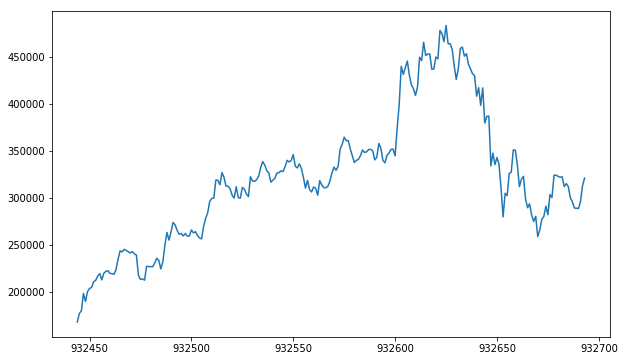

In [88]:
log_returns = np.log(1 + stock_data_price.pct_change())
stock_data_price.plot(figsize=(10, 6));


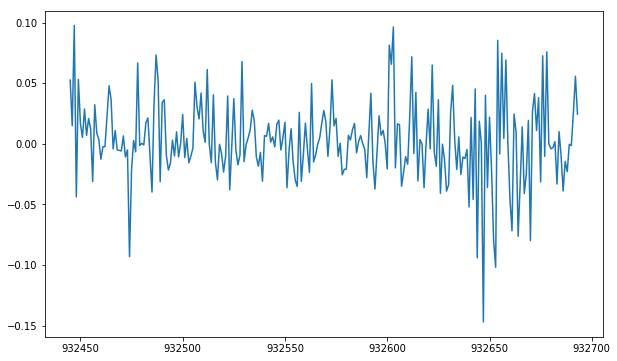

In [89]:
log_returns.plot(figsize = (10, 6))


In [90]:
u = log_returns.mean()
print('평균수익:   '+str(u))

평균수익:   0.002594395581922523


In [91]:
var = log_returns.var()
print('분산:   '+str(var))

분산:   0.0011205908262079583


In [92]:
drift = u - (0.5 * var)
drift= np.array(drift)

In [93]:
stdev = log_returns.std()
stdev= np.array(stdev)

In [94]:
Z = norm.ppf(np.random.rand(10,2))
t_intervals = 100
iterations = 10000
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))


In [95]:
S0 = stock_data_price.iloc[-1:]

In [96]:
price_list = np.zeros_like(daily_returns)


In [97]:
price_list[0] = S0


In [98]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

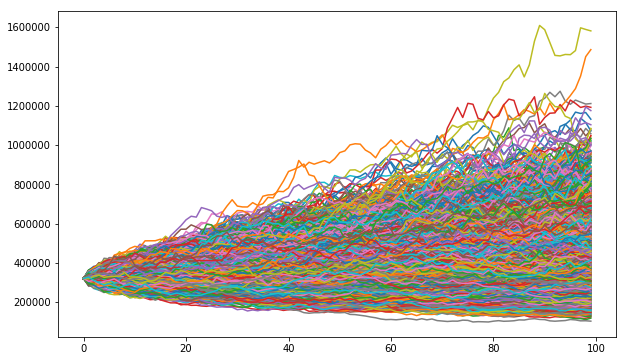

In [99]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

In [100]:
len(price_list)

100

In [101]:
price_list_pd = pd.DataFrame(price_list)

In [102]:
price_list_pd

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,321100.000000,321100.000000,321100.000000,321100.000000,321100.000000,321100.000000,321100.000000,321100.000000,321100.000000,321100.000000,...,321100.000000,321100.000000,321100.000000,321100.000000,321100.000000,321100.000000,321100.000000,321100.000000,321100.000000,321100.000000
1,328157.340957,324808.796778,307560.141706,306151.313295,339151.566003,317012.865184,310464.979995,325239.241514,306119.447187,338729.356640,...,329128.543691,309745.245091,322373.048884,308360.941484,329536.561387,316860.830738,306014.257938,334476.437940,318924.072069,327232.287087
2,344533.732822,348696.558111,298208.955694,309637.148218,341289.569753,296610.863390,315655.392789,333380.188673,310925.403372,345818.284405,...,336965.244111,306476.152052,318891.813530,303308.886432,335298.383579,312748.312465,310216.066699,349719.273555,333612.504690,310806.758424
3,345811.561431,352214.566052,288866.783233,320213.969096,328897.683353,299995.790080,323066.323024,324314.018606,316861.069947,329947.437010,...,343421.135089,285225.902331,330726.311389,311460.000577,346956.250736,322182.429894,294316.390489,342135.392619,338809.368759,298990.788312
4,358406.437470,355329.869743,286659.053811,306510.970549,316740.161224,286225.317063,343740.035674,308737.848861,324692.362349,360011.039848,...,344737.845434,284638.485757,320626.217994,308906.570774,344711.632241,330056.393793,306556.222862,349799.424747,326989.907027,287069.671894
5,358445.867753,350768.454987,298250.239230,318744.931655,299516.698378,264666.010124,350318.970883,313425.153863,314512.223748,371599.279468,...,335886.794821,286348.706813,325496.183060,316838.529727,340766.787403,322715.564102,310753.244427,341416.979047,330062.608830,294998.818662
6,355764.591312,333403.119666,303485.417344,325736.466888,302803.694334,286120.037215,347553.856926,320135.392187,312388.680646,359986.849901,...,350094.824495,284459.455365,326004.588651,311145.805015,333713.553254,334544.415738,318819.916910,341867.857172,331935.086274,283694.115228
7,355224.252632,339990.267646,292638.261937,324437.283154,303679.025127,282692.581775,355709.578737,321519.107614,315104.626813,348024.416390,...,336932.821740,275171.349554,356064.101823,303891.823827,342910.192286,354037.712462,302587.807923,328646.494819,333058.057704,273884.393281
8,345819.132738,336843.368546,282169.133098,316161.714532,306864.363370,286838.688441,357050.024376,327613.526715,296928.295347,346469.045685,...,337352.895635,263556.753254,346358.331793,328400.715333,353065.185606,367282.492479,287789.301096,319512.178579,351619.162168,284948.500791
9,328019.498423,337456.513675,281544.183180,294956.330731,304815.150806,283229.123685,375801.566108,316779.261483,302723.751003,351050.814298,...,351109.279954,256484.893454,329375.509442,338101.738718,360253.487824,371435.257873,291544.804729,312156.793563,328972.040214,292357.204023


In [103]:
print("Count:", len(price_list_pd.iloc[len(price_list_pd)-1,:]))
print("Mean: ", np.mean(price_list_pd.iloc[len(price_list_pd)-1,:]))
print("SD: ",np.std(price_list_pd.iloc[len(price_list_pd)-1,:]))
print("Max: ",np.max(price_list_pd.iloc[len(price_list_pd)-1,:]))
print("Min: ", np.min(price_list_pd.iloc[len(price_list_pd)-1,:]))

Count: 10000
Mean:  416025.7918887581
SD:  142474.09520362454
Max:  1582377.8567947415
Min:  103389.08238433184


In [104]:
ending_values = price_list_pd.iloc[len(price_list_pd)-1,:]
ending_values.describe()

count    1.000000e+04
mean     4.160258e+05
std      1.424812e+05
min      1.033891e+05
25%      3.131135e+05
50%      3.947386e+05
75%      4.942744e+05
max      1.582378e+06
Name: 99, dtype: float64

In [105]:
len(ending_values[ending_values>stock_data_price.iloc[-1]*1.1]) / len(ending_values)

0.6253

In [106]:
p_tiles = np.percentile(ending_values,[5,10,15,25,75,85,90, 95])
for p in range(len(p_tiles)):
    l = [5,10,15,25,75,85,90,95]
    print( "{}%-ile: ".format(l[p]).rjust(15),"{}".format(p_tiles[p]))

       5%-ile:  226974.1174099566
      10%-ile:  255679.99542573243
      15%-ile:  277051.03499496076
      25%-ile:  313113.5022929588
      75%-ile:  494274.3622709437
      85%-ile:  556548.3171027702
      90%-ile:  602629.7595680384
      95%-ile:  682659.5899591878


In [36]:
def average(values):
  if len(values) == 0:
    return None
  return sum(values, 0.0) / len(values)

average(var_all)

In [7]:
company_name =list(set(stock['종목명']))

company_list =[]
hope_return_list=[]
var_all =[]
stoce_return_all=[]
for company in company_name:

    stock_data = stock[stock['종목명']==company]
    if len(stock_data)<500:
        continue


    stock_data_price=stock_data['종가']
    log_returns = np.log(1 + stock_data_price.pct_change())

    u = log_returns.mean()
    if u<0:
        continue
    var = log_returns.var()
#     if var>0.0005:
#         continue
    
    
    drift = u - (0.5 * var)
    drift= np.array(drift)
    stdev = log_returns.std()
    stdev= np.array(stdev)
    
    np.random.seed(1994)

    Z = norm.ppf(np.random.rand(10,2))
    t_intervals = 100
    iterations = 10000
    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

    S0 = stock_data_price.iloc[-1:]
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0
    for t in range(1, t_intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]

    price_list_pd = pd.DataFrame(price_list)

    ending_values = price_list_pd.iloc[len(price_list_pd)-1,:]
    

    hope_return = len(ending_values[ending_values>stock_data_price.iloc[-1]*1.1]) / len(ending_values)
    stoce_return = average(ending_values)/stock_data_price.iloc[-1]
    if hope_return>0.5:
        print(company)
        company_list.append(company)
        hope_return_list.append(hope_return)
        stoce_return_all.append(stoce_return)
    var_all.append(var)

엔지켐생명과학
파크시스템스
나이스평가정보
이엘피
고영테크놀러지
F&F
한국콜마홀딩스
메디톡스
에스케이씨코오롱피아이
리드
미래컴퍼니
예스티
휴젤


In [44]:
company_name =list(set(stock['종목명']))

company_list =[]
hope_return_list=[]
var_all =[]
stoce_return_all=[]
for company in company_name:

    stock_data = stock[stock['종목명']==company]
    if len(stock_data)<500:
        continue
        
    if stock_data.iloc[len(stock_data)-1,:]['날짜']<20170101:
        continue
#     stock_data = stock_data[(20120101<stock_data['날짜'])&(stock_data['날짜']<20170101)]
    stock_data = stock_data[stock_data['날짜']<20170101]

    stock_data_price=stock_data['종가']
    log_returns = np.log(1 + stock_data_price.pct_change())

    u = log_returns.mean()
    if u<0:
        continue
    var = log_returns.var()
#     if var>0.0005:
#         continue
    
    
    drift = u - (0.5 * var)
    drift= np.array(drift)
    stdev = log_returns.std()
    stdev= np.array(stdev)
    
    np.random.seed(1994)

    Z = norm.ppf(np.random.rand(10,2))
    t_intervals = 100
    iterations = 10000
    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

    S0 = stock_data_price.iloc[-1:]
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0
    for t in range(1, t_intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]

    price_list_pd = pd.DataFrame(price_list)

    ending_values = price_list_pd.iloc[len(price_list_pd)-1,:]
    

    hope_return = len(ending_values[ending_values>stock_data_price.iloc[-1]*1.1]) / len(ending_values)
    stoce_return = (average(ending_values)-stock_data_price.iloc[-1])/stock_data_price.iloc[-1]
    if hope_return>0.5:
        print(company)
        company_list.append(company)
        hope_return_list.append(hope_return)
        stoce_return_all.append(stoce_return)
    var_all.append(var)

칩스앤미디어
육일씨엔에쓰
엔지켐생명과학
한샘
와이아이케이
티피씨메카트로닉스
정다운
대림제지
메디아나
파크시스템스
코디엠
나이스평가정보
이엘피
SPC삼립
와이제이엠게임즈
한국콜마홀딩스
아진산업
원익아이피에스
에스와이패널
메디톡스
제이스텍
BGF
케이디켐
영우디에스피
리드
예스티
뉴트리바이오텍
휴젤
인터로조
쎌바이오텍
나무가


In [ ]:
def ex(adding,stock_data):
    adding =100*adding
#     if stock_data[stock_data['날짜']==20170103]==None:
#         num=0
#     else:
    
#     num = adding/float(stock_data[stock_data['날짜']==20170103]['종가'])
    num = round(adding)
#     if adding < 1:
#         num=10
    result = float(stock_data[stock_data['날짜']==20170601]['종가'])*num-float(stock_data[stock_data['날짜']==20170103]['종가'])*num
    money= float(stock_data[stock_data['날짜']==20170103]['종가'])*num
    return money,result


In [66]:
return_all=[]
money_all=[]
for add,company in enumerate(company_list):
    adding= stoce_return_all[add]

    stock_data = stock[stock['종목명']==company]
    money,return1 = ex(adding,stock_data)
    money_all.append(money)
    return_all.append(return1)


In [67]:
sum(money_all)

37320104.1484133

In [68]:
sum(return_all)

6700106.4569997

In [73]:
6700106.4569997/37320104.1484133

0.17953075453259584

In [50]:
stoce_return_all

[0.25121276930806175,
 0.21440782893817917,
 0.22625794795917073,
 0.17561100203347166,
 0.13738679012487068,
 0.19690933787483067,
 0.2016633108253072,
 0.20180667064923272,
 0.24886672141379831,
 0.32037490969365984,
 2.5781279013737173,
 0.25299212897621337,
 0.5680626442715858,
 0.17943656596704044,
 0.6440582669904189,
 0.1756718072349698,
 0.16731159281267896,
 0.3097915926069157,
 1.5541319439234125,
 0.16694325116275943,
 0.16387508006008805,
 0.17800210746349396,
 0.1455499119769883,
 0.260888339568877,
 0.6126872481997466,
 0.35280368462960787,
 0.3335383111493067,
 0.28885339187037107,
 0.13837655578566543,
 0.16428178279125064,
 0.2202617242641553]

In [55]:
average(stoce_return_all)

0.3751659071580595

In [56]:
len(company_list)

31

In [32]:
import random


company_name =list(set(stock['종목명']))

company_list2 =[]

for company in company_name:

    stock_data = stock[stock['종목명']==company]
    if len(stock_data)<500:
        continue
        
    if stock_data.iloc[len(stock_data)-1,:]['날짜']<20170101:
        continue
        
    company_list2.append(company)

In [59]:
ran_com_all=[]
for i in range(31):
    ran_com = company_list2[random.randrange(10)]
    ran_com_all.append(ran_com)

In [43]:
def ex(adding,stock_data):
    adding =100*adding
#     if stock_data[stock_data['날짜']==20170103]==None:
#         num=0
#     else:
    
#     num = adding/float(stock_data[stock_data['날짜']==20170103]['종가'])
    num = round(adding)

    result = float(stock_data[stock_data['날짜']==20170601]['종가'])*num-float(stock_data[stock_data['날짜']==20170103]['종가'])*num
    money= float(stock_data[stock_data['날짜']==20170103]['종가'])*num
    return money,result

In [70]:
return_all2=[]
money_all2=[]
for add,company in enumerate(ran_com_all):
    adding= 0.3

    stock_data = stock[stock['종목명']==company]
    money,return1 = ex(adding,stock_data)
    money_all2.append(money)
    return_all2.append(return1)

In [71]:
sum(money_all2)

5122304.185320001

In [72]:
sum(return_all2)

-246996.12198

In [231]:
sum(return_all2)/sum(money_all2)

-0.04821972945063777

In [75]:
company_name =list(set(stock['종목명']))

company_list3 =[]
hope_return_list3=[]
var_all =[]
stoce_return_all=[]
for company in company_name:

    stock_data = stock[stock['종목명']==company]
    if len(stock_data)<500:
        continue
        
    if stock_data.iloc[len(stock_data)-1,:]['날짜']<20170101:
        continue
#     stock_data = stock_data[(20120101<stock_data['날짜'])&(stock_data['날짜']<20170101)]
    stock_data = stock_data[stock_data['날짜']<20170101]

    stock_data_price=stock_data['종가']
    log_returns = np.log(1 + stock_data_price.pct_change())

    u = log_returns.mean()
    if u<0:
        continue
    var = log_returns.var()
#     if var>0.0005:
#         continue
    
    
    drift = u - (0.5 * var)
    drift= np.array(drift)
    stdev = log_returns.std()
    stdev= np.array(stdev)
    
    np.random.seed(1994)

    Z = norm.ppf(np.random.rand(10,2))
    t_intervals = 100
    iterations = 10000
    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

    S0 = stock_data_price.iloc[-1:]
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0
    for t in range(1, t_intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]

    price_list_pd = pd.DataFrame(price_list)

    ending_values = price_list_pd.iloc[len(price_list_pd)-1,:]
    

    hope_return = len(ending_values[ending_values>stock_data_price.iloc[-1]*1.2]) / len(ending_values)
    stoce_return = (average(ending_values)-stock_data_price.iloc[-1])/stock_data_price.iloc[-1]
    if hope_return>0.5:
        print(company)
        company_list3.append(company)
        hope_return_list3.append(hope_return)
        stoce_return_all.append(stoce_return)
    var_all.append(var)

파크시스템스
코디엠
이엘피
원익아이피에스
에스와이패널
리드
뉴트리바이오텍
휴젤


In [79]:
return_all3=[]
money_all3=[]
for add,company in enumerate(company_list3):
    adding= stoce_return_all[add]

    stock_data = stock[stock['종목명']==company]
    money,return1 = ex(adding,stock_data)
    money_all3.append(money)
    return_all3.append(return1)


In [82]:
sum(return_all3)

2787197.5118687

In [83]:
sum(money_all3)

17125257.4881313

In [232]:
sum(return_all3) /sum(money_all3)

0.16275361195592963

In [226]:
company_name =list(set(stock['종목명']))

company_list4 =[]
hope_return_list4=[]
var_all =[]
stoce_return_all=[]
for company in company_name:

    stock_data = stock[stock['종목명']==company]
    if len(stock_data)<500:
        continue
        
    if stock_data.iloc[len(stock_data)-1,:]['날짜']<20170101:
        continue
#     stock_data = stock_data[(20120101<stock_data['날짜'])&(stock_data['날짜']<20170101)]
    stock_data = stock_data[stock_data['날짜']<20170101]

    stock_data_price=stock_data['종가']
    log_returns = np.log(1 + stock_data_price.pct_change())

    u = log_returns.mean()
    if u<0:
        continue
    var = log_returns.var()
#     if var>0.0005:
#         continue
    
    
    drift = u - (0.5 * var)
    drift= np.array(drift)
    stdev = log_returns.std()
    stdev= np.array(stdev)
    
    np.random.seed(1994)

    Z = norm.ppf(np.random.rand(10,2))
    t_intervals = 100
    iterations = 10000
    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

    S0 = stock_data_price.iloc[-1:]
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0
    for t in range(1, t_intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]

    price_list_pd = pd.DataFrame(price_list)

    ending_values = price_list_pd.iloc[len(price_list_pd)-1,:]
    

    hope_return = len(ending_values[ending_values>stock_data_price.iloc[-1]*1.1]) / len(ending_values)
    stoce_return = (average(ending_values)-stock_data_price.iloc[-1])/stock_data_price.iloc[-1]
    if hope_return>0.6:
        print(company)
        company_list4.append(company)
        hope_return_list4.append(hope_return)
        stoce_return_all.append(stoce_return)
    var_all.append(var)

와이아이케이
파크시스템스
코디엠
원익아이피에스
에스와이패널
뉴트리바이오텍
휴젤


In [227]:
return_all4=[]
money_all4=[]
for add,company in enumerate(company_list4):
    adding= 0.3

    stock_data = stock[stock['종목명']==company]
    money,return1 = ex(adding,stock_data)
    money_all4.append(money)
    return_all4.append(return1)

In [228]:
sum(money_all4)

12722365.3848

In [229]:
sum(return_all4)

4547284.6152

In [230]:
sum(return_all4)/sum(money_all4)

0.35742446295661745

In [37]:
company_name =list(set(stock['종목명']))

company_list4_2 =[]
hope_return_list4_2=[]
var_all =[]
stoce_return_all=[]
for company in company_name:

    stock_data = stock[stock['종목명']==company]
    if len(stock_data)<500:
        continue
        
    if stock_data.iloc[len(stock_data)-1,:]['날짜']<20170101:
        continue
#     stock_data = stock_data[(20120101<stock_data['날짜'])&(stock_data['날짜']<20170101)]
    stock_data = stock_data[stock_data['날짜']<20170101]

    stock_data_price=stock_data['종가']
    log_returns = np.log(1 + stock_data_price.pct_change())

    u = log_returns.mean()
    if u<0:
        continue
    var = log_returns.var()
#     if var>0.0005:
#         continue
    
    
    drift = u - (0.5 * var)
    drift= np.array(drift)
    stdev = log_returns.std()
    stdev= np.array(stdev)
    
    np.random.seed(3200)

    Z = norm.ppf(np.random.rand(10,2))
    t_intervals = 100
    iterations = 10000
    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

    S0 = stock_data_price.iloc[-1:]
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0
    for t in range(1, t_intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]

    price_list_pd = pd.DataFrame(price_list)

    ending_values = price_list_pd.iloc[len(price_list_pd)-1,:]
    

    hope_return = len(ending_values[ending_values>stock_data_price.iloc[-1]*1.1]) / len(ending_values)
    stoce_return = (average(ending_values)-stock_data_price.iloc[-1])/stock_data_price.iloc[-1]
    if hope_return>0.5:
        print(company)
        company_list4_2.append(company)
        hope_return_list4_2.append(hope_return)
        stoce_return_all.append(stoce_return)
    var_all.append(var)

육일씨엔에쓰
메디아나
쎌바이오텍
이엘피
제이스텍
나이스평가정보
티피씨메카트로닉스
아진산업
와이아이케이
코디엠
인터로조
메디톡스
정다운
SPC삼립
리드
한샘
파크시스템스
BGF
에스와이패널
영우디에스피
대림제지
휴젤
케이디켐
엔지켐생명과학
와이제이엠게임즈
예스티
뉴트리바이오텍
나무가
한국콜마홀딩스
원익아이피에스
칩스앤미디어


In [38]:
len(company_list4_2)

31

In [44]:
return_all4_2=[]
money_all4_2=[]
for add,company in enumerate(company_list4_2):
    adding= stoce_return_all[add]

    stock_data = stock[stock['종목명']==company]
    money,return1 = ex(adding,stock_data)
    money_all4_2.append(money)
    return_all4_2.append(return1)


In [45]:
sum(money_all4_2)

37560846.1460966

In [46]:
sum(return_all4_2)

6654180.228546401

In [47]:
sum(return_all4_2)/sum(money_all4_2)

0.17715735696326734

In [48]:
money_all4_2

[176000.0,
 398750.0,
 782000.0,
 1325300.0,
 362100.0,
 180180.0,
 148200.0,
 107292.87921199999,
 38220.0,
 580125.0,
 513800.0,
 5921100.0,
 98500.0,
 2889000.0,
 17442.6666646,
 3474000.0,
 617600.0,
 770592.2884199999,
 3575493.84712,
 291200.0,
 37100.0,
 9306100.0,
 273750.0,
 903822.4716,
 355770.0,
 433006.99308,
 1020000.0,
 1282600.0,
 519300.0,
 813750.0,
 348750.0]

In [49]:
return_all4_2

[-12980.0,
 -78750.0,
 -148750.0,
 182700.0,
 28900.0,
 35880.0,
 -3000.0,
 -19167.311078999992,
 8610.0,
 -118755.0,
 23800.0,
 2995400.0,
 -39200.0,
 1062000.0,
 114927.3333354,
 315000.0,
 32000.0,
 444180.1518000001,
 -2198603.84712,
 -49140.0,
 -8300.0,
 4863300.0,
 -21750.0,
 -184361.7975900001,
 -79060.0,
 43300.69920000003,
 -265200.0,
 -471900.0,
 161100.0,
 139500.0,
 -97500.0]

In [58]:
company_name =list(set(stock['종목명']))

company_list4_3 =[]
hope_return_list4_3=[]
var_all =[]
stoce_return_all=[]
for company in company_name:

    stock_data = stock[stock['종목명']==company]
    if len(stock_data)<500:
        continue
        
    if stock_data.iloc[len(stock_data)-1,:]['날짜']<20170101:
        continue
#     stock_data = stock_data[(20120101<stock_data['날짜'])&(stock_data['날짜']<20170101)]
    stock_data = stock_data[stock_data['날짜']<20170101]

    stock_data_price=stock_data['종가']
    log_returns = np.log(1 + stock_data_price.pct_change())

    u = log_returns.mean()
    if u<0:
        continue
    var = log_returns.var()
#     if var>0.0005:
#         continue
    
    
    drift = u - (0.5 * var)
    drift= np.array(drift)
    stdev = log_returns.std()
    stdev= np.array(stdev)
    
    np.random.seed(194)

    Z = norm.ppf(np.random.rand(10,2))
    t_intervals = 100
    iterations = 10000
    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

    S0 = stock_data_price.iloc[-1:]
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0
    for t in range(1, t_intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]

    price_list_pd = pd.DataFrame(price_list)

    ending_values = price_list_pd.iloc[len(price_list_pd)-1,:]
    

    hope_return = len(ending_values[ending_values>stock_data_price.iloc[-1]*1.2]) / len(ending_values)
    stoce_return = (average(ending_values)-stock_data_price.iloc[-1])/stock_data_price.iloc[-1]
    if hope_return>0.5:
        print(company)
        company_list4_3.append(company)
        hope_return_list4_3.append(hope_return)
        stoce_return_all.append(stoce_return)
    var_all.append(var)

이엘피
코디엠
리드
파크시스템스
에스와이패널
휴젤
뉴트리바이오텍
원익아이피에스


In [69]:
return_all4_3=[]
money_all4_3=[]
for add,company in enumerate(company_list4_3):
    adding= stoce_return_all[add]

    stock_data = stock[stock['종목명']==company]
    money,return1 = ex(adding,stock_data)
    money_all4_3.append(money)
    return_all4_3.append(return1)

In [70]:
sum(return_all4_3)

2771453.6657086997

In [71]:
sum(money_all4_3)

17156531.3342913

In [72]:
sum(return_all4_3)/sum(money_all4_3)

0.1615392768915537

In [73]:
return_all4_3

[179550.0,
 -113970.0,
 113073.6666687,
 32000.0,
 -2184600.0009600003,
 4863300.0,
 -257400.0,
 139500.0]

In [74]:
money_all4_3

[1302450.0,
 556750.0,
 17161.3333313,
 617600.0,
 3552720.0009600003,
 9306100.0,
 990000.0,
 813750.0]

In [75]:
company_name =list(set(stock['종목명']))

company_list4_4 =[]
hope_return_list4_4=[]
var_all =[]
stoce_return_all=[]
for company in company_name:

    stock_data = stock[stock['종목명']==company]
    if len(stock_data)<500:
        continue
        
    if stock_data.iloc[len(stock_data)-1,:]['날짜']<20170101:
        continue
#     stock_data = stock_data[(20120101<stock_data['날짜'])&(stock_data['날짜']<20170101)]
    stock_data = stock_data[stock_data['날짜']<20170101]

    stock_data_price=stock_data['종가']
    log_returns = np.log(1 + stock_data_price.pct_change())

    u = log_returns.mean()
    if u<0:
        continue
    var = log_returns.var()
#     if var>0.0005:
#         continue
    
    
    drift = u - (0.5 * var)
    drift= np.array(drift)
    stdev = log_returns.std()
    stdev= np.array(stdev)
    
    np.random.seed(100)

    Z = norm.ppf(np.random.rand(10,2))
    t_intervals = 100
    iterations = 10000
    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

    S0 = stock_data_price.iloc[-1:]
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0
    for t in range(1, t_intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]

    price_list_pd = pd.DataFrame(price_list)

    ending_values = price_list_pd.iloc[len(price_list_pd)-1,:]
    

    hope_return = len(ending_values[ending_values>stock_data_price.iloc[-1]*1.1]) / len(ending_values)
    stoce_return = (average(ending_values)-stock_data_price.iloc[-1])/stock_data_price.iloc[-1]
    if hope_return>0.6:
        print(company)
        company_list4_4.append(company)
        hope_return_list4_4.append(hope_return)
        stoce_return_all.append(stoce_return)
    var_all.append(var)

와이아이케이
코디엠
파크시스템스
에스와이패널
휴젤
뉴트리바이오텍
원익아이피에스


In [76]:
return_all4_4=[]
money_all4_4=[]
for add,company in enumerate(company_list4_4):
    adding= stoce_return_all[add]

    stock_data = stock[stock['종목명']==company]
    money,return1 = ex(adding,stock_data)
    money_all4_4.append(money)
    return_all4_4.append(return1)

In [77]:
sum(return_all4_4)

2488309.9990399997

In [78]:
sum(money_all4_4)

15870890.00096

In [79]:
sum(return_all4_4)/sum(money_all4_4)

0.15678452808188367

In [80]:
money_all4_4

[38220.0,
 552500.0,
 617600.0,
 3552720.0009600003,
 9306100.0,
 990000.0,
 813750.0]

In [81]:
return_all4_4

[8610.0,
 -113100.0,
 32000.0,
 -2184600.0009600003,
 4863300.0,
 -257400.0,
 139500.0]

In [ ]:
company_name =list(set(stock['종목명']))

company_list4_5 =[]
hope_return_list4_5=[]
var_all =[]
stoce_return_all=[]
for company in company_name:

    stock_data = stock[stock['종목명']==company]
    if len(stock_data)<500:
        continue
        
    if stock_data.iloc[len(stock_data)-1,:]['날짜']<20170101:
        continue
#     stock_data = stock_data[(20120101<stock_data['날짜'])&(stock_data['날짜']<20170101)]
    stock_data = stock_data[stock_data['날짜']<20170101]

    stock_data_price=stock_data['종가']
    log_returns = np.log(1 + stock_data_price.pct_change())

    u = log_returns.mean()
    if u<0:
        continue
    var = log_returns.var()
#     if var>0.0005:
#         continue
    
    
    drift = u - (0.5 * var)
    drift= np.array(drift)
    stdev = log_returns.std()
    stdev= np.array(stdev)
    
    np.random.seed(256)

    Z = norm.ppf(np.random.rand(10,2))
    t_intervals = 100
    iterations = 10000
    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

    S0 = stock_data_price.iloc[-1:]
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0
    for t in range(1, t_intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]

    price_list_pd = pd.DataFrame(price_list)

    ending_values = price_list_pd.iloc[len(price_list_pd)-1,:]
    

    hope_return = len(ending_values[ending_values>stock_data_price.iloc[-1]*1.1]) / len(ending_values)
    stoce_return = (average(ending_values)-stock_data_price.iloc[-1])/stock_data_price.iloc[-1]
    if hope_return>0.5:
        print(company)
        company_list4_5.append(company)
        hope_return_list4_5.append(hope_return)
        stoce_return_all.append(stoce_return)
    var_all.append(var)

In [ ]:
return_all4_5=[]
money_all4_5=[]
for add,company in enumerate(company_list4_2):
    adding= 0.3

    stock_data = stock[stock['종목명']==company]
    money,return1 = ex(adding,stock_data)
    money_all4_5.append(money)
    return_all4_5.append(return1)

In [ ]:
sum(return_all4_5)

In [ ]:
sum(money_all4_5)

In [ ]:
sum(return_all4_5)/sum(money_all4_5)

In [100]:
ran_com_all_20=[]
for i in range(20):
    ran_com = company_list2[random.randrange(len(company_list2))]
    ran_com_all_20.append(ran_com)

In [110]:
return_all_ran20=[]
money_all_ran20=[]
for add,company in enumerate(ran_com_all_20):
    adding= 0.3

    stock_data = stock[stock['종목명']==company]
    money,return1 = ex(adding,stock_data)
    money_all_ran20.append(money)
    return_all_ran20.append(return1)

In [111]:
sum(money_all_ran20)

11763847.411578

In [112]:
sum(return_all_ran20)

754894.5884220001

In [114]:
754894.5884220001/11763847.411578

0.0641707225545132

In [174]:
ran_com_all_8=[]
for i in range(8):
    ran_com = company_list2[random.randrange(len(company_list2))]
    ran_com_all_8.append(ran_com)

In [175]:
return_all_ran8=[]
money_all_ran8=[]
for add,company in enumerate(ran_com_all_8):
    adding= 0.3

    stock_data = stock[stock['종목명']==company]
    money,return1 = ex(adding,stock_data)
    money_all_ran8.append(money)
    return_all_ran8.append(return1)

In [176]:
sum(money_all_ran8)

1933720.4853

In [177]:
sum(return_all_ran8)

102340.22901000001

In [178]:
sum(return_all_ran8)/sum(money_all_ran8)

0.05292400312660638

In [119]:
ran_com_all_10=[]
for i in range(10):
    ran_com = company_list2[random.randrange(len(company_list2))]
    ran_com_all_10.append(ran_com)

In [120]:
return_all_ran10=[]
money_all_ran10=[]
for add,company in enumerate(ran_com_all_20):
    adding= 0.3

    stock_data = stock[stock['종목명']==company]
    money,return1 = ex(adding,stock_data)
    money_all_ran10.append(money)
    return_all_ran10.append(return1)

In [121]:
sum(money_all_ran10)

11763847.411578

In [122]:
sum(return_all_ran10)

754894.5884220001

In [123]:
754894.5884220001/11763847.411578


0.0641707225545132

In [ ]:
###1번

In [236]:
ran_com_all=[]
for i in range(30):
    ran_com = company_list2[random.randrange(len(company_list2))]
    ran_com_all.append(ran_com)

return_all_ran30=[]
money_all_ran30=[]
for add,company in enumerate(ran_com_all):
    adding= 0.3

    stock_data = stock[stock['종목명']==company]
    money,return1 = ex(adding,stock_data)
    money_all_ran30.append(money)
    return_all_ran30.append(return1)

In [237]:
sum(money_all_ran30)

20621817.65136

In [238]:
sum(return_all_ran30)

1562605.14453

In [239]:
sum(return_all_ran30)/sum(money_all_ran30)

0.07577436533228907

In [50]:
ran_com_all=[]
for i in range(30):
    ran_com = company_list2[random.randrange(len(company_list2))]
    ran_com_all.append(ran_com)

return_all_ran30=[]
money_all_ran30=[]
for add,company in enumerate(ran_com_all):
    adding= 0.3

    stock_data = stock[stock['종목명']==company]
    money,return1 = ex(adding,stock_data)
    money_all_ran30.append(money)
    return_all_ran30.append(return1)

In [51]:
sum(money_all_ran30)

14927908.178730002

In [52]:
sum(return_all_ran30)

1995563.98734

In [53]:
sum(return_all_ran30)/sum(money_all_ran30)

0.13368008186059016

In [54]:
ran_com_all=[]
for i in range(30):
    ran_com = company_list2[random.randrange(len(company_list2))]
    ran_com_all.append(ran_com)

return_all_ran30=[]
money_all_ran30=[]
for add,company in enumerate(ran_com_all):
    adding= 0.3

    stock_data = stock[stock['종목명']==company]
    money,return1 = ex(adding,stock_data)
    money_all_ran30.append(money)
    return_all_ran30.append(return1)

In [55]:
sum(money_all_ran30)

18906685.17483

In [56]:
sum(return_all_ran30)

1843605.37905

In [57]:
sum(return_all_ran30)/sum(money_all_ran30)

0.09751076732923791

In [65]:
return_all_ran30

[240000.0,
 1350.0,
 -367337.0691,
 187500.0,
 19800.0,
 261000.0,
 96450.0,
 1350.0,
 219000.0,
 -4500.0,
 -4950.0,
 -42287.92560000002,
 10500.0,
 -136291.1394,
 -15426.075270000001,
 31500.0,
 564000.0,
 144000.0,
 -1500.0,
 -750.0,
 -32400.0,
 106500.0,
 -49500.0,
 600000.0,
 27300.0,
 117000.0,
 27150.0,
 6147.588420000007,
 -159000.0,
 -3000.0]